<a href="https://colab.research.google.com/github/ashwini0921/Market-Segmentation-EV_ASHWINI_KUMAR_TASK_2/blob/main/Market_Segmentation_EV_ASHWINI_KUMAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving ElectricCarData_Norm.csv to ElectricCarData_Norm.csv


In [55]:
import pandas as pd
data=pd.read_csv("ElectricCarData_Norm.csv");
data

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5 sec,160 km/h,330 km,191 Wh/km,440 km/h,Rapid charging possible,Front Wheel Drive,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5 sec,210 km/h,335 km,258 Wh/km,540 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9 sec,200 km/h,325 km,194 Wh/km,440 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1 sec,200 km/h,375 km,232 Wh/km,450 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,65000


Preprocessing

In [56]:
data = data.rename(columns={"Accel": "Accel(sec)","TopSpeed": "Top Speed(km/h)","Range":"Range(km)","Efficiency":"Efficiency(Wh/km)","FastCharge":"FastCharge(km/h)"})

In [57]:
title=["Accel(sec)","Top Speed(km/h)","Range(km)","Efficiency(Wh/km)","FastCharge(km/h)"]
for classes in title:
  data[classes]=data[classes].str.extract('([-+]?\d*\.?\d+)')

In [58]:
for classes in title:
  data[classes] = data[classes].astype('float')

In [59]:
data


,Brand,Model,Accel(sec),Top Speed(km/h),Range(km),Efficiency(Wh/km),FastCharge(km/h),RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233.0,450.0,161.0,940.0,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160.0,270.0,167.0,250.0,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210.0,400.0,181.0,620.0,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180.0,360.0,206.0,560.0,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145.0,170.0,168.0,190.0,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160.0,330.0,191.0,440.0,Rapid charging possible,Front Wheel Drive,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210.0,335.0,258.0,540.0,Rapid charging possible,All Wheel Drive,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200.0,325.0,194.0,440.0,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200.0,375.0,232.0,450.0,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,65000


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              103 non-null    object 
 1   Model              103 non-null    object 
 2   Accel(sec)         103 non-null    float64
 3   Top Speed(km/h)    103 non-null    float64
 4   Range(km)          103 non-null    float64
 5   Efficiency(Wh/km)  103 non-null    float64
 6   FastCharge(km/h)   98 non-null     float64
 7   RapidCharge        103 non-null    object 
 8   PowerTrain         103 non-null    object 
 9   PlugType           103 non-null    object 
 10  BodyStyle          103 non-null    object 
 11  Segment            103 non-null    object 
 12  Seats              103 non-null    int64  
 13  PriceEuro          103 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 11.4+ KB


In [61]:
print(pd.isnull(data).sum())

Brand                0
Model                0
Accel(sec)           0
Top Speed(km/h)      0
Range(km)            0
Efficiency(Wh/km)    0
FastCharge(km/h)     5
RapidCharge          0
PowerTrain           0
PlugType             0
BodyStyle            0
Segment              0
Seats                0
PriceEuro            0
dtype: int64


In [62]:
data['FastCharge(km/h)'].fillna(data['FastCharge(km/h)'].median(), inplace=True)
print(pd.isnull(data).sum())

Brand                0
Model                0
Accel(sec)           0
Top Speed(km/h)      0
Range(km)            0
Efficiency(Wh/km)    0
FastCharge(km/h)     0
RapidCharge          0
PowerTrain           0
PlugType             0
BodyStyle            0
Segment              0
Seats                0
PriceEuro            0
dtype: int64


In [63]:
data.to_csv('ElectricCarData_Norm_process.csv', index=False)

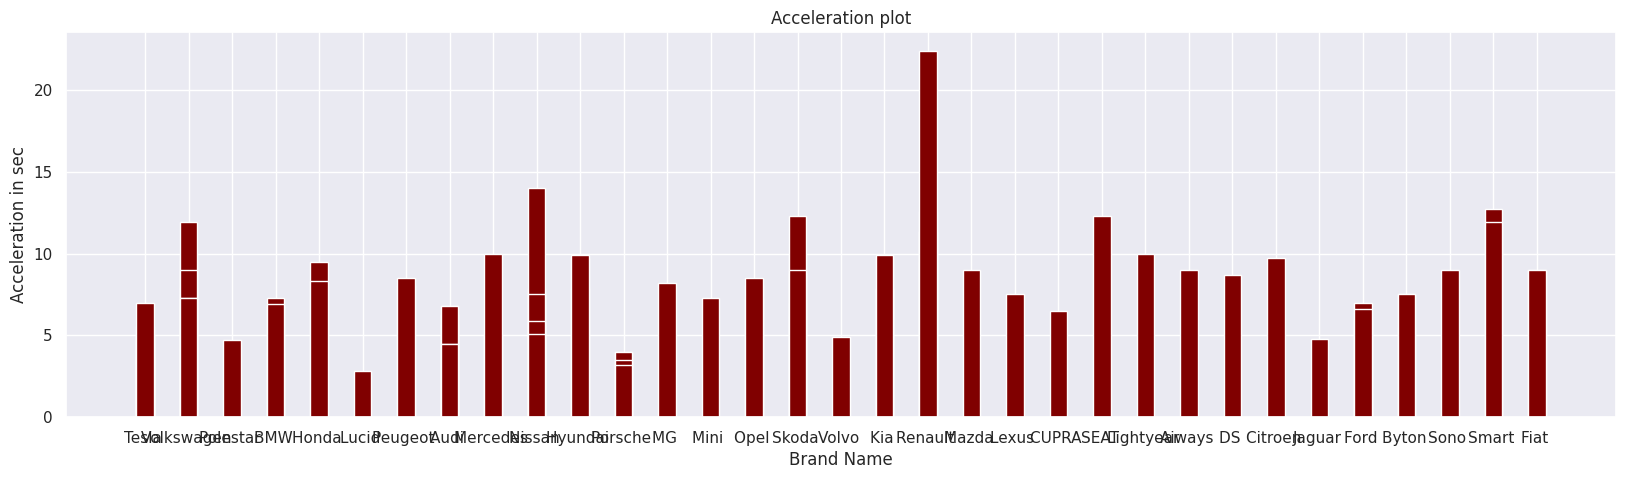

In [64]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20, 5))

# creating the bar plot
plt.bar(data["Brand"], data["Accel(sec)"], color ='maroon',
        width = 0.4)

plt.xlabel("Brand Name")
plt.ylabel("Acceleration in sec")
plt.title("Acceleration plot")
plt.show()

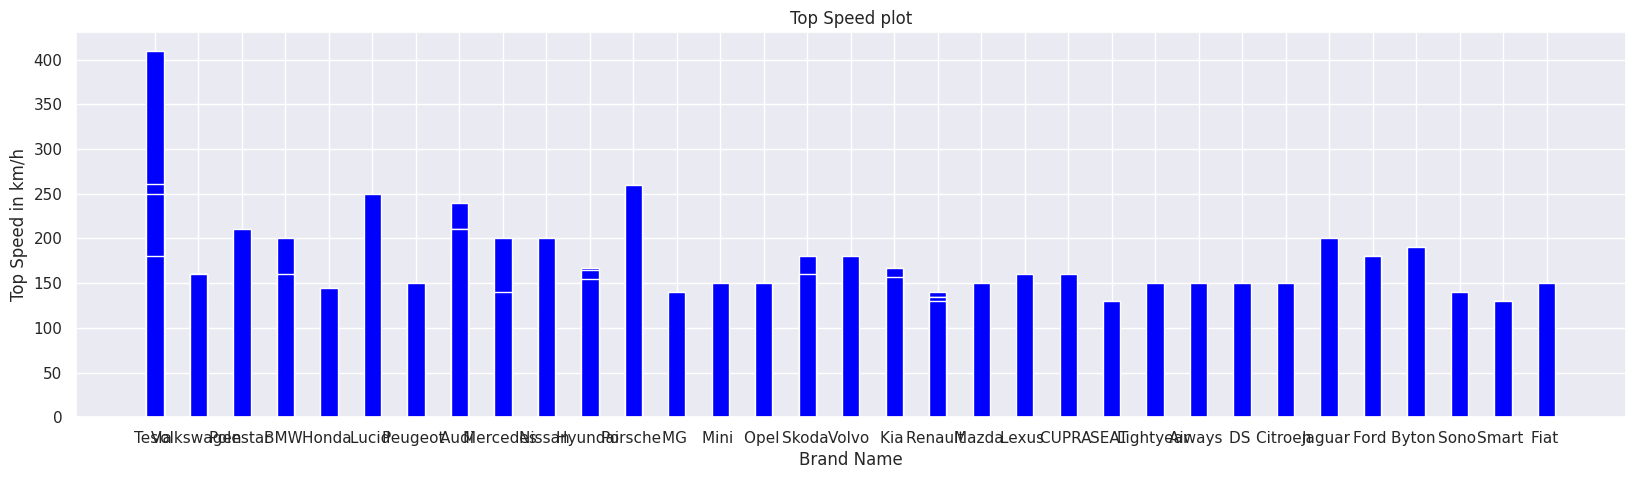

In [65]:
fig = plt.figure(figsize = (20, 5))

# creating the bar plot
plt.bar(data["Brand"], data["Top Speed(km/h)"], color ='blue',
        width = 0.4)

plt.xlabel("Brand Name")
plt.ylabel("Top Speed in km/h")
plt.title("Top Speed plot")
plt.show()

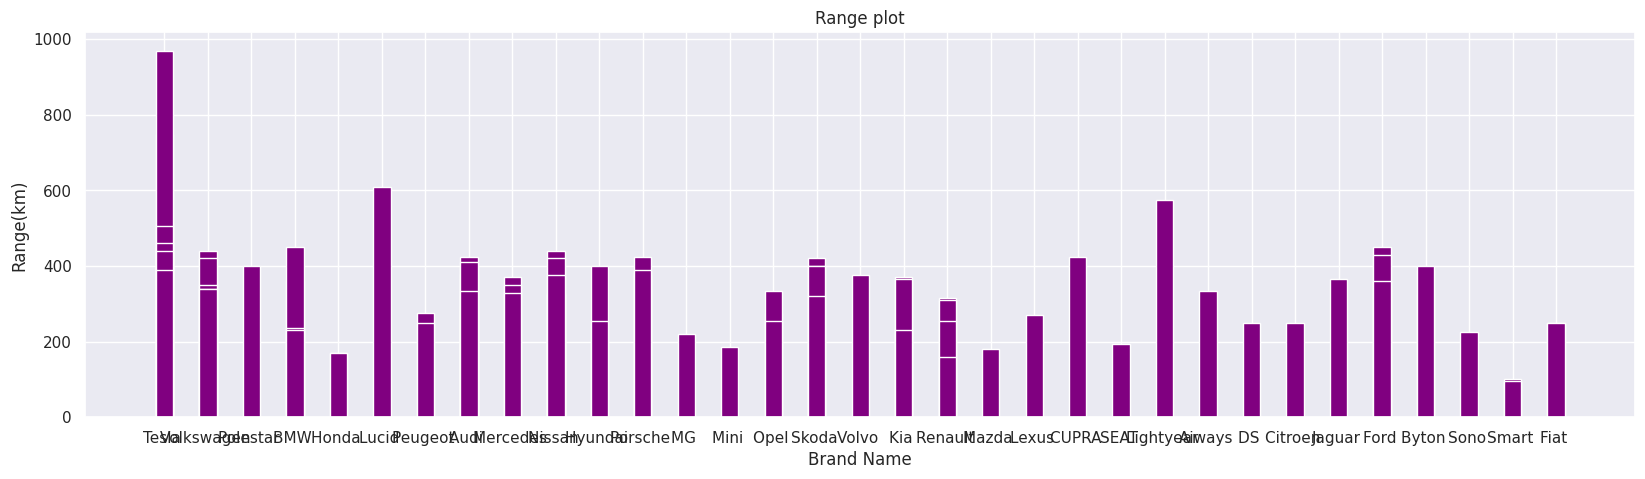

In [66]:
fig = plt.figure(figsize = (20, 5))

# creating the bar plot
plt.bar(data["Brand"], data["Range(km)"], color ='purple',
        width = 0.4)

plt.xlabel("Brand Name")
plt.ylabel("Range(km)")
plt.title("Range plot")
plt.show()

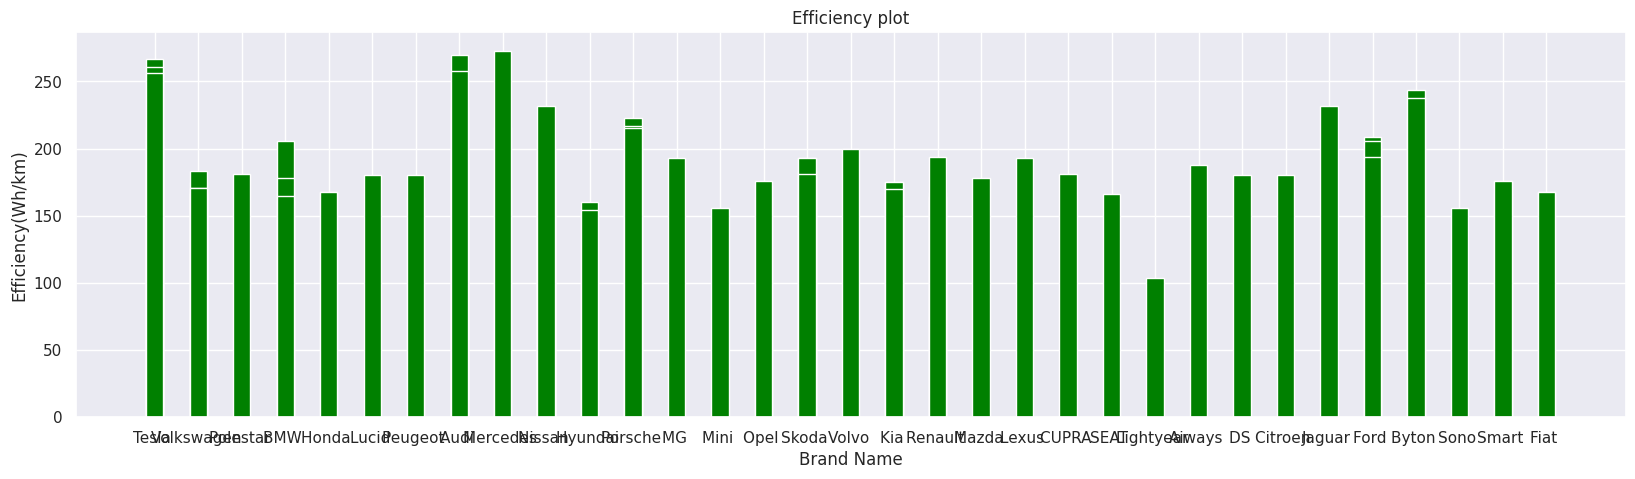

In [67]:
fig = plt.figure(figsize = (20, 5))

# creating the bar plot
plt.bar(data["Brand"], data["Efficiency(Wh/km)"], color ='green',
        width = 0.4)
plt.xlabel("Brand Name")
plt.ylabel("Efficiency(Wh/km)")
plt.title("Efficiency plot")
plt.show()

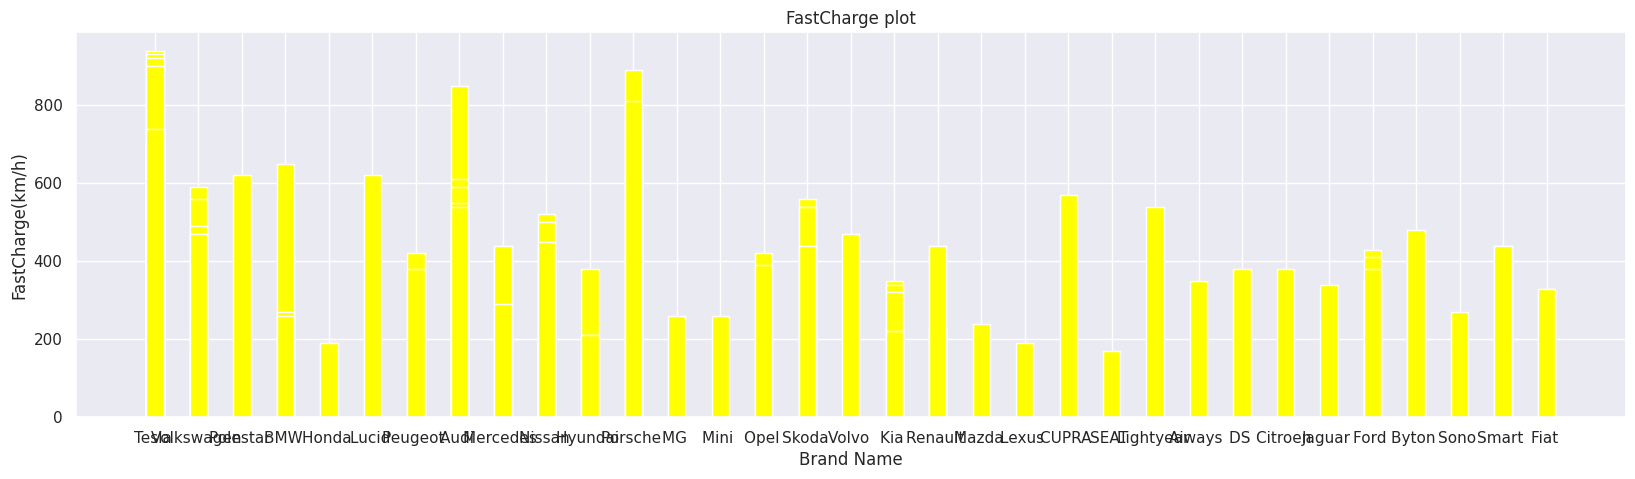

In [68]:
fig = plt.figure(figsize = (20, 5))

# creating the bar plot
plt.bar(data["Brand"], data["FastCharge(km/h)"], color ='yellow',
        width = 0.4)
plt.xlabel("Brand Name")
plt.ylabel("FastCharge(km/h)")
plt.title("FastCharge plot")
plt.show()

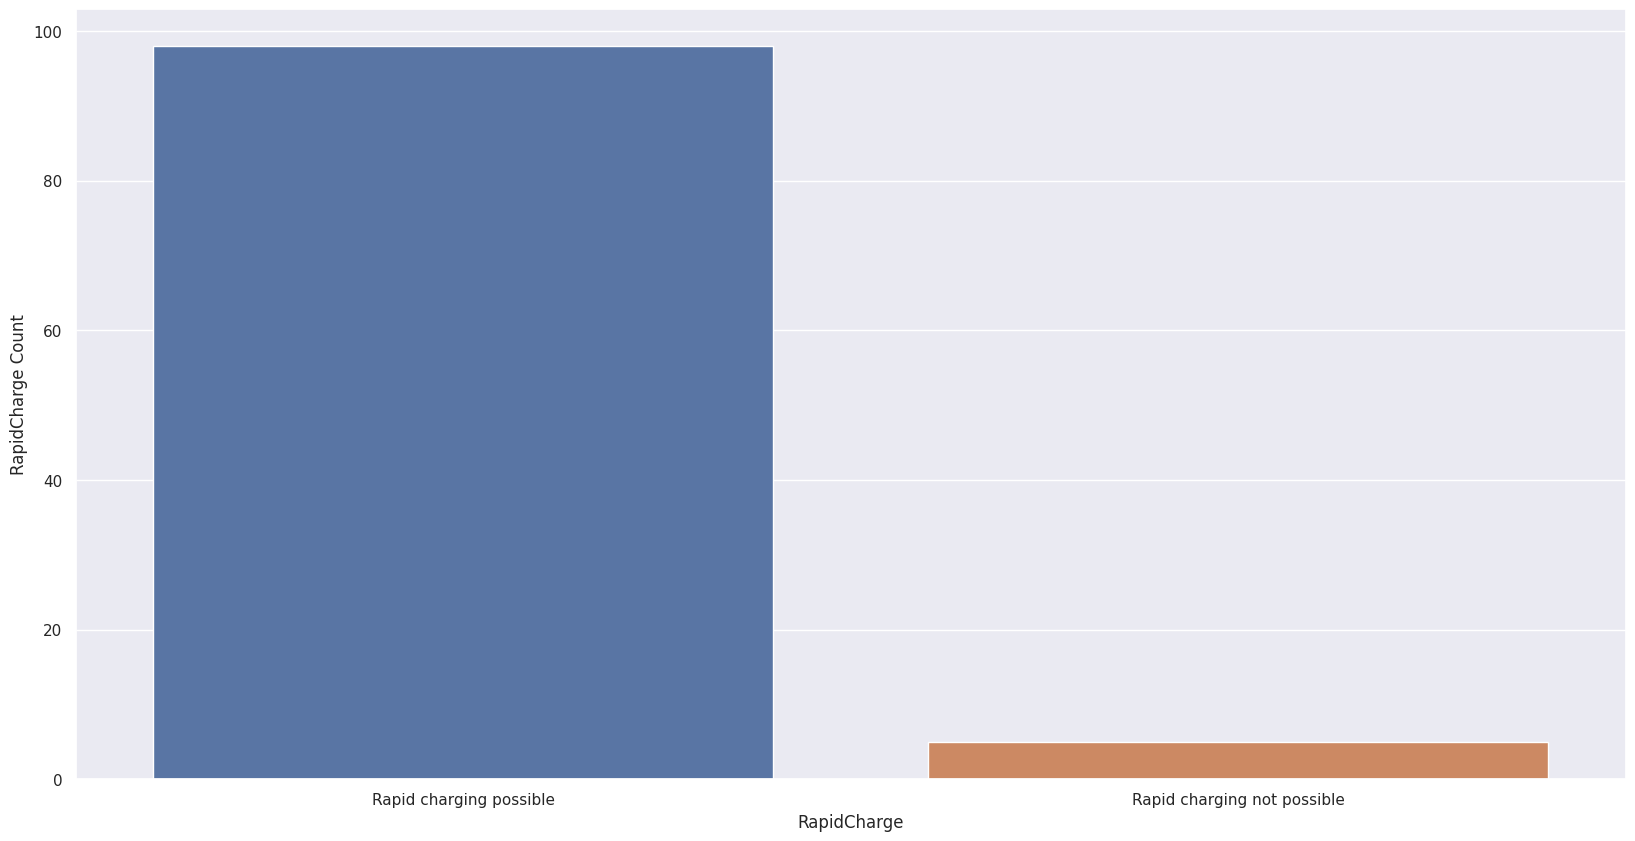

In [69]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.countplot(x=data["RapidCharge"])
plt.xlabel("RapidCharge")
plt.ylabel("RapidCharge Count")
plt.show()

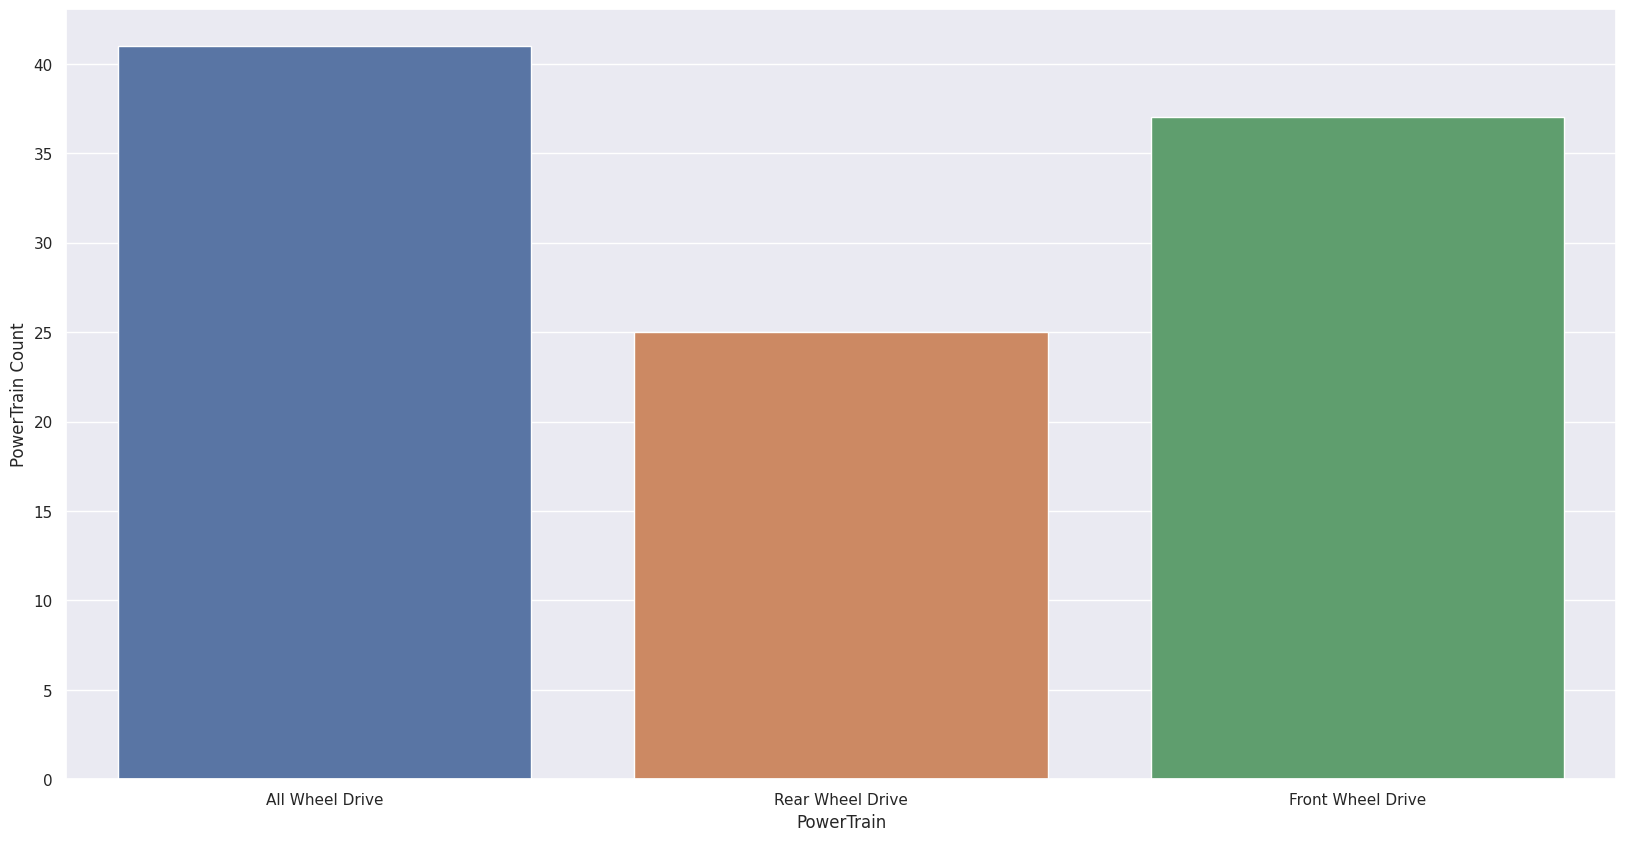

In [70]:
plt.figure(figsize=(20,10))
sns.countplot(x=data["PowerTrain"])
plt.xlabel("PowerTrain")
plt.ylabel("PowerTrain Count")
plt.show()

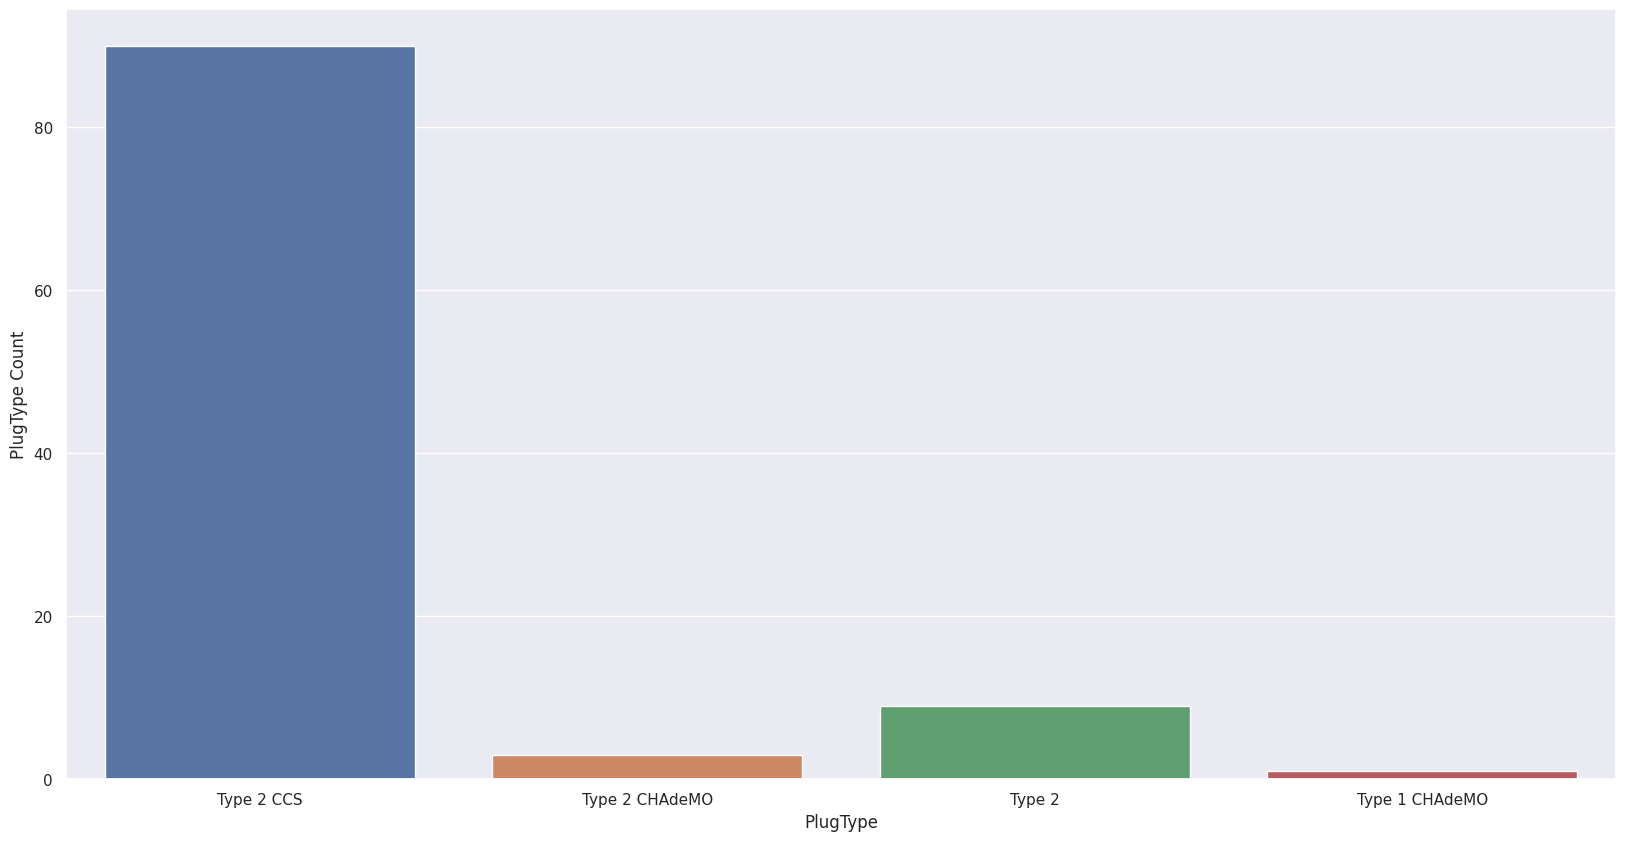

In [71]:
plt.figure(figsize=(20,10))
sns.countplot(x=data["PlugType"])
plt.xlabel("PlugType")
plt.ylabel("PlugType Count")
plt.show()

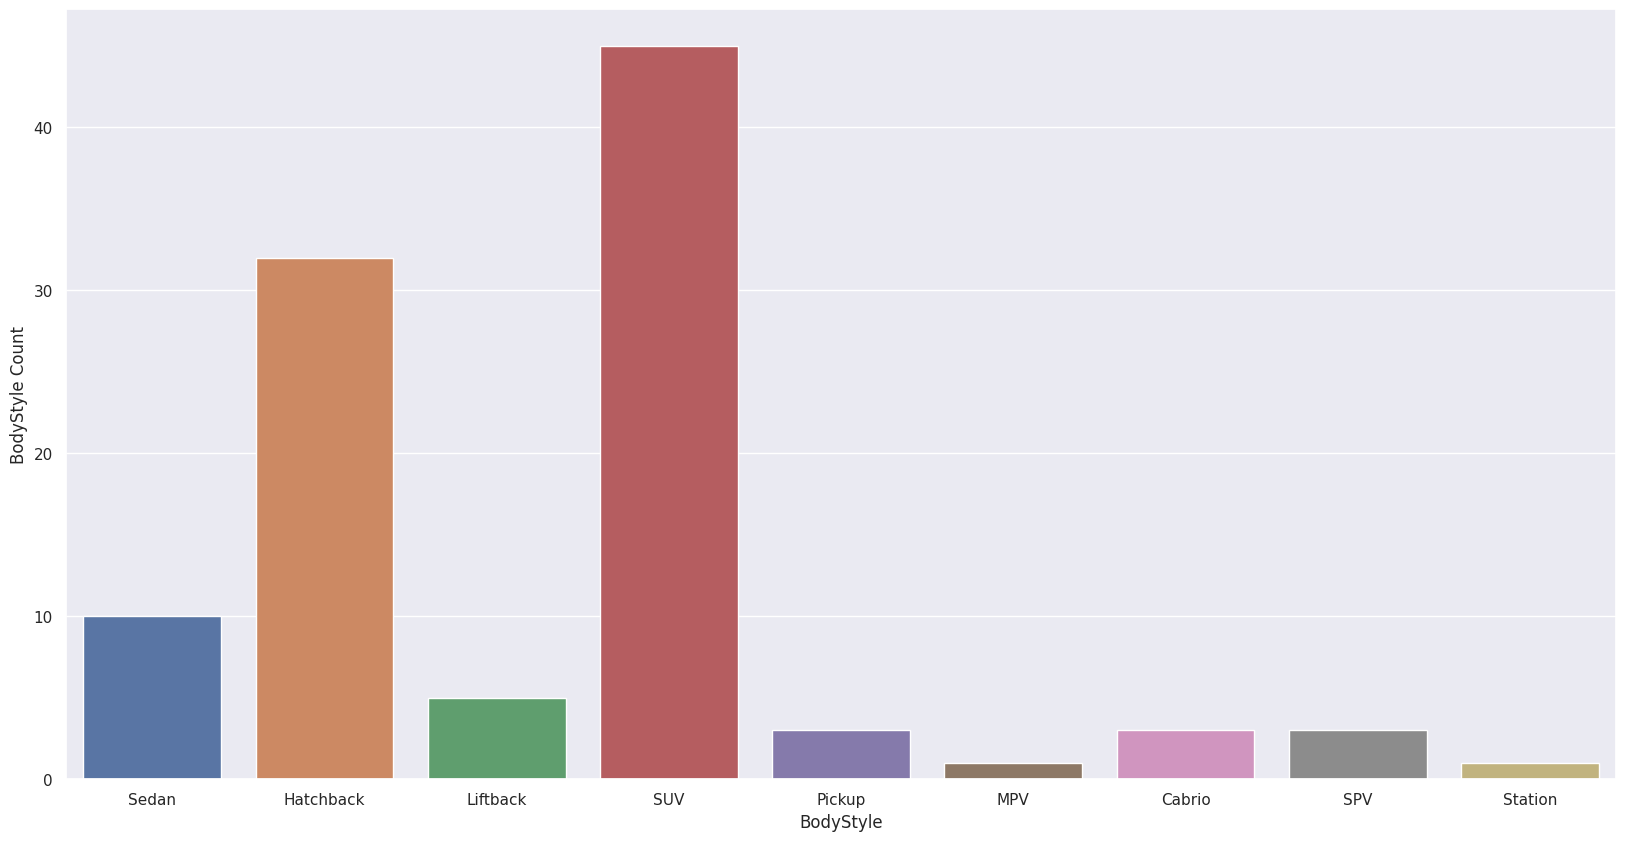

In [72]:
plt.figure(figsize=(20,10))
sns.countplot(x=data["BodyStyle"])
plt.xlabel("BodyStyle")
plt.ylabel("BodyStyle Count")
plt.show()

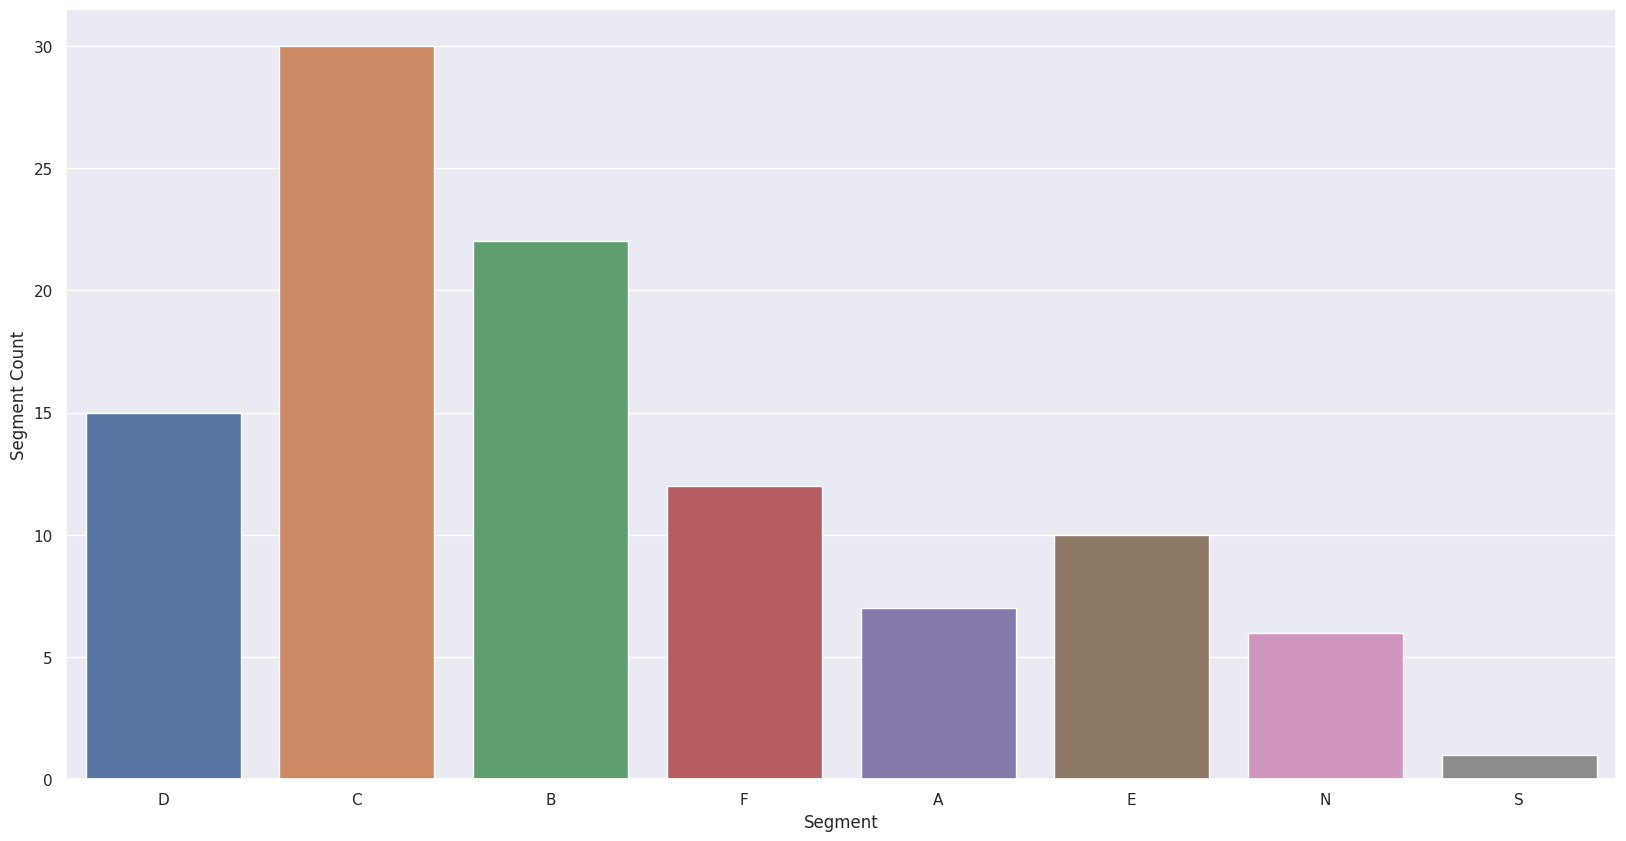

In [73]:
plt.figure(figsize=(20,10))
sns.countplot(x=data["Segment"])
plt.xlabel("Segment")
plt.ylabel("Segment Count")
plt.show()

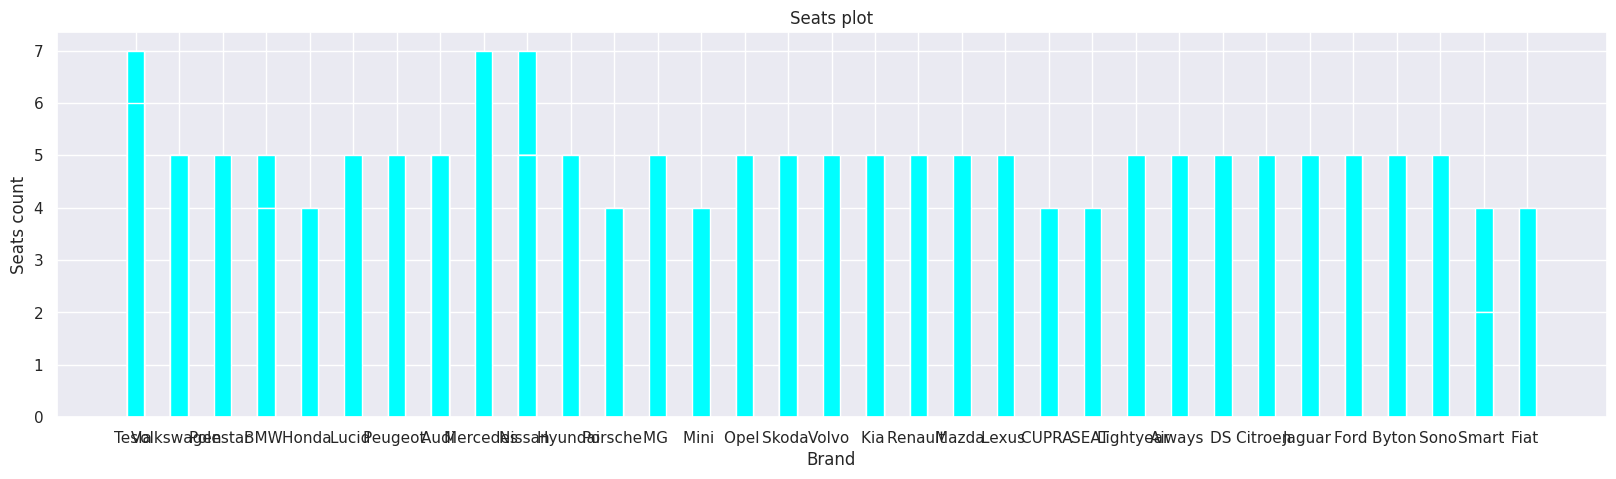

In [74]:
fig = plt.figure(figsize = (20, 5))

# creating the bar plot
plt.bar(data["Brand"], data["Seats"], color ='cyan',
        width = 0.4)
plt.xlabel("Brand")
plt.ylabel("Seats count")
plt.title("Seats plot")
plt.show()

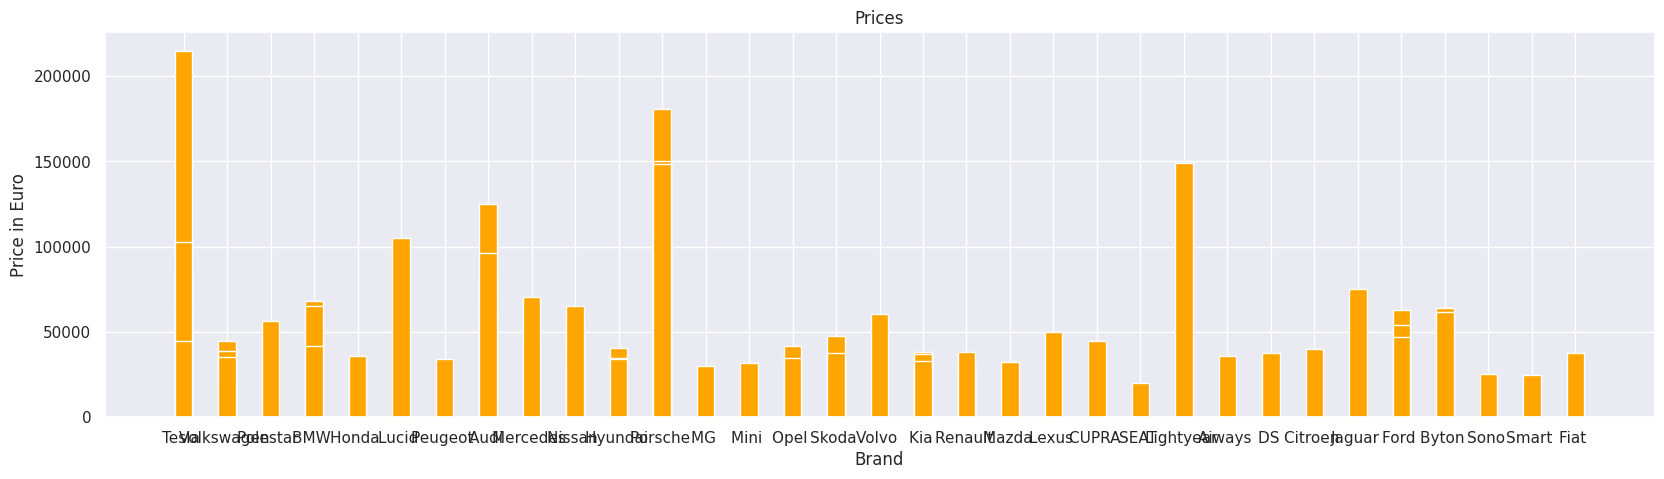

In [75]:
fig = plt.figure(figsize = (20, 5))

# creating the bar plot
plt.bar(data["Brand"], data["PriceEuro"], color ='orange',
        width = 0.4)
plt.xlabel("Brand")
plt.ylabel("Price in Euro")
plt.title("Prices")
plt.show()


In [76]:
X = data[["Accel(sec)","Top Speed(km/h)","Range(km)","Efficiency(Wh/km)","FastCharge(km/h)"]].copy()

In [77]:
X

,Accel(sec),Top Speed(km/h),Range(km),Efficiency(Wh/km),FastCharge(km/h)
0,4.6,233.0,450.0,161.0,940.0
1,10.0,160.0,270.0,167.0,250.0
2,4.7,210.0,400.0,181.0,620.0
3,6.8,180.0,360.0,206.0,560.0
4,9.5,145.0,170.0,168.0,190.0
...,...,...,...,...,...
98,7.5,160.0,330.0,191.0,440.0
99,4.5,210.0,335.0,258.0,540.0
100,5.9,200.0,325.0,194.0,440.0
101,5.1,200.0,375.0,232.0,450.0


In [78]:
print(pd.isnull(X).sum())

Accel(sec)           0
Top Speed(km/h)      0
Range(km)            0
Efficiency(Wh/km)    0
FastCharge(km/h)     0
dtype: int64


In [79]:
import sklearn
from sklearn.cluster import KMeans
wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0, n_init="auto")
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

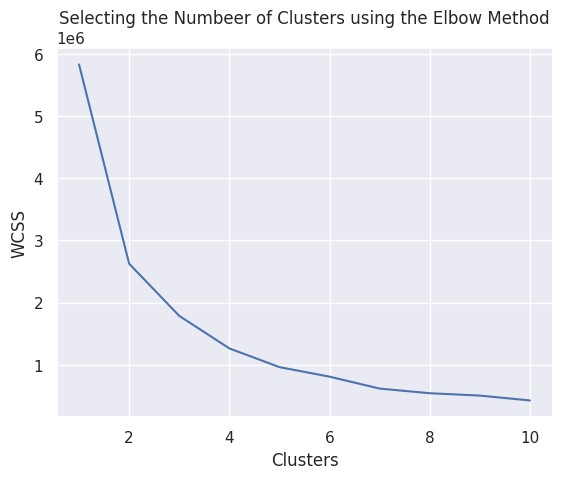

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.plot(range(1, 11), wcss)
plt.title('Selecting the Numbeer of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

In [81]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto")
kmeans.fit(X)

KMeans(n_clusters=2, n_init='auto', random_state=0)

In [82]:
Y=kmeans.predict(X.iloc[0:])

In [83]:
Y

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1], dtype=int32)

In [84]:
data['cluster_performance'] = Y.tolist()

In [85]:
data

,Brand,Model,Accel(sec),Top Speed(km/h),Range(km),Efficiency(Wh/km),FastCharge(km/h),RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,cluster_performance
0,Tesla,Model 3 Long Range Dual Motor,4.6,233.0,450.0,161.0,940.0,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480,1
1,Volkswagen,ID.3 Pure,10.0,160.0,270.0,167.0,250.0,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000,0
2,Polestar,2,4.7,210.0,400.0,181.0,620.0,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440,1
3,BMW,iX3,6.8,180.0,360.0,206.0,560.0,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040,1
4,Honda,e,9.5,145.0,170.0,168.0,190.0,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160.0,330.0,191.0,440.0,Rapid charging possible,Front Wheel Drive,Type 2 CCS,Hatchback,C,5,45000,0
99,Audi,e-tron S Sportback 55 quattro,4.5,210.0,335.0,258.0,540.0,Rapid charging possible,All Wheel Drive,Type 2 CCS,SUV,E,5,96050,1
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200.0,325.0,194.0,440.0,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,50000,0
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200.0,375.0,232.0,450.0,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,65000,0


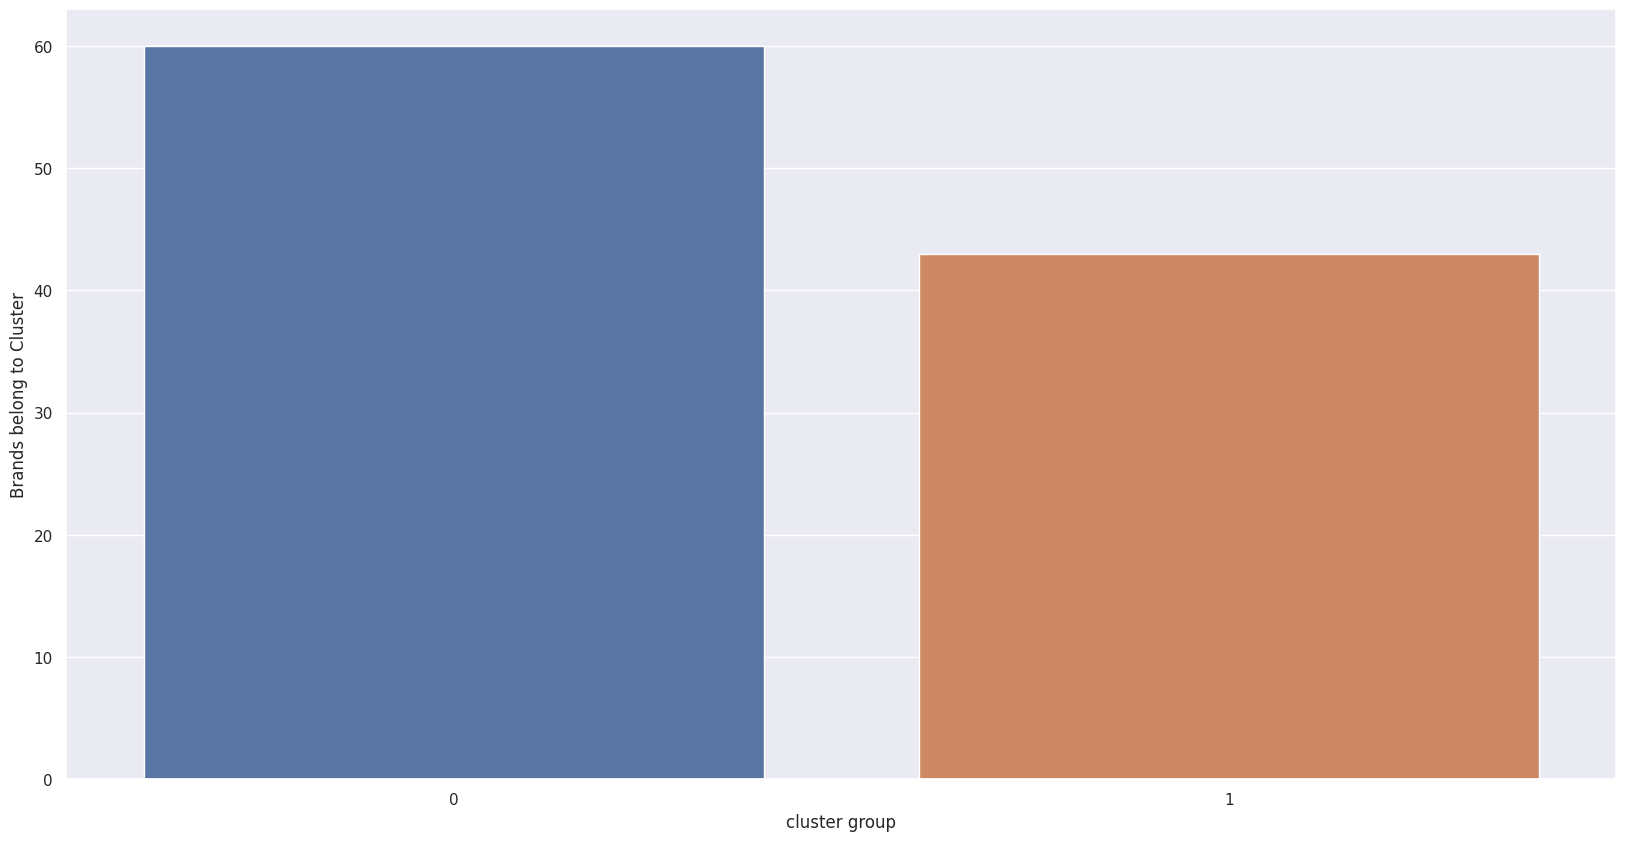

In [86]:
plt.figure(figsize=(20,10))
sns.countplot(x=data['cluster_performance'])
plt.xlabel("cluster group")
plt.ylabel("Brands belong to Cluster")
plt.show()